___
<h1 style="color:blue;">Dyna-Q and CartPole Data</h1>

___

## Introduction to Dyna-Q

Dyna-Q is a reinforcement learning algorithm that integrates learning, planning, and acting in a unified framework. It extends Q-learning by incorporating a model of the environment, allowing the agent to generate simulated experiences to update its knowledge. This combination of real and simulated experiences accelerates learning and improves the agent's performance.

## Key Concepts

1. **Model-Based Learning**: Dyna-Q uses a model of the environment to predict the outcomes of actions. The model is learned from real experiences and used to generate simulated experiences for planning.
   
2. **Real and Simulated Experiences**: The agent collects real experiences by interacting with the environment and generates simulated experiences using the model. Both types of experiences are used to update the Q-values.
   
3. **Planning**: Planning involves updating Q-values based on simulated experiences. This allows the agent to explore possible future states without physically interacting with the environment, speeding up the learning process.
   
4. **Exploration and Exploitation**: The agent balances exploration (trying new actions) and exploitation (using known actions) to maximize its cumulative reward. This balance is crucial for efficient learning.
   
5. **Q-Values Update**: Q-values are updated based on both real and simulated experiences, ensuring that the agent's knowledge is continually refined and improved.

## Algorithm

The Dyna-Q algorithm can be summarized as follows:

1. **Initialization**: Initialize Q-values and the model of the environment.
   
2. **Action Selection**: Select an action based on the current policy (e.g., epsilon-greedy).
   
3. **Environment Interaction**: Take the action, observe the next state and reward.
   
4. **Model Update**: Update the model with the observed transition (state, action, reward, next state).
   
5. **Q-Value Update**: Update Q-values using the real experience.
   
6. **Planning**: Generate simulated experiences using the model and update Q-values based on these simulated experiences.
   
7. **Iteration**: Repeat steps 2-6 for a fixed number of iterations or until convergence.

## Applications

Dyna-Q is suitable for a variety of applications, including:

1. **Robotics**: Enhancing robot control and navigation by efficiently learning from both real and simulated experiences.
   
2. **Game Playing**: Improving strategies in games by using a model to simulate different scenarios and outcomes.
   
3. **Autonomous Driving**: Optimizing decision-making in autonomous vehicles by integrating real driving data with simulated scenarios.
   
4. **Resource Management**: Managing resources in complex systems by leveraging simulated experiences to explore different management strategies.

## Dataset
## Grid World Environment

### Definition

A grid world is a simple yet powerful environment often used in reinforcement learning to simulate various scenarios. It consists of a grid of cells, where each cell represents a state that an agent can occupy. The environment is defined by:

- **Grid Size**: The dimensions of the grid, typically represented as `(rows, columns)`.
  
- **Start State**: The initial position from which the agent begins its exploration or task.
  
- **Goal State**: The target position or positions that the agent aims to reach, marking successful completion of a task.

- **Actions**: The set of possible moves that the agent can make to transition between states. Common actions include moving up, down, left, and right.

- **Rewards**: Immediate feedback given to the agent based on its actions and current state. Rewards can vary based on the goal state, obstacles, or other factors.

### Components

#### Grid Size
The grid size determines the layout of the environment and is defined by its number of rows and columns. For example, a grid size of `(5, 5)` represents a 5x5 grid with 25 cells.

#### Start State
The starting position from which the agent begins its exploration or task. In a grid world, this is often represented by coordinates `(row, column)` within the grid.

#### Goal State
The position or positions that signify successful completion of the agent's task. It can be a single coordinate `(row, column)` or multiple coordinates in the grid.

#### Actions
Actions define the possible movements or operations that the agent can perform to navigate the grid. Common actions include:
- Move **Up**: Decrease the row index.
- Move **Down**: Increase the row index.
- Move **Left**: Decrease the column index.
- Move **Right**: Increase the column index.

#### Rewards
Rewards are scalar values that provide immediate feedback to the agent based on its actions and state transitions:
- Positive rewards (e.g., `+1`) typically given upon reaching the goal state.
- Negative rewards (e.g., `-1`) for undesirable states or actions.
- Zero reward (`0`) upon reaching certain states or during intermediate steps.

### Usage in Reinforcement Learning

Grid worlds serve as foundational environments for training and evaluating reinforcement learning agents. They allow researchers and practitioners to study fundamental concepts such as:
- **Policy Learning**: Determining the optimal sequence of actions to achieve a goal.
- **Value Estimation**: Estimating the expected cumulative reward from a given state.
- **Exploration vs. Exploitation**: Balancing between exploring new actions and exploiting known rewards.

---

___
## <span style="color:blue;">Model</span>

___

### Step 1: Install and Import Necessary Libraries
First, we need to install and import the necessary libraries. We will use OpenAI Gym for the CartPole environment, NumPy for numerical operations, and Matplotlib for visualization.

In [1]:
#Importing Libraries
import numpy as np
import random

# Define the grid world environment
grid_size = (5, 5)  # 5x5 grid
start_state = (0, 0)  # Starting state
goal_state = (4, 4)   # Goal state
actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up

### Define the grid world environment

`grid_size = (5, 5)`  
This line defines the size of the grid world as 5x5, meaning there are 5 rows and 5 columns in the grid.

`start_state = (0, 0)`  
Here, `start_state` represents the starting position of the agent in the grid. In this case, `(0, 0)` indicates that the agent starts at the top-left corner of the grid.

`goal_state = (4, 4)`  
The `goal_state` defines the position where the agent aims to reach. `(4, 4)` specifies that the goal is located at the bottom-right corner of the grid.

`actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]`  
The `actions` list enumerates the possible movements the agent can take in the grid. Each tuple represents a movement direction:
- `(0, 1)`: Rightward movement (increasing column index).
- `(1, 0)`: Downward movement (increasing row index).
- `(0, -1)`: Leftward movement (decreasing column index).
- `(-1, 0)`: Upward movement (decreasing row index).

These definitions establish the fundamental characteristics of the grid world environment, including its size, starting point, goal location, and allowable movements for the agent.


### Step 2: Initialize the Environment and Hyperparameters
We initialize the CartPole environment and set the parameters for the Dyna-Q algorithm.

In [2]:
# Q-table initialization
Q = np.zeros((grid_size[0], grid_size[1], len(actions)))

# Model (transition function) initialization
model = {}

# Parameters
alpha = 0.1  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Epsilon-greedy exploration factor
num_episodes = 1000


### Q-table initialization

`Q = np.zeros((grid_size[0], grid_size[1], len(actions)))`  
This line initializes the Q-table, which is a multidimensional array used in reinforcement learning algorithms like Q-learning and Dyna-Q. 
- `grid_size[0]` and `grid_size[1]` specify the dimensions of the grid world environment (rows and columns).
- `len(actions)` determines the number of possible actions the agent can take in each state. 
- `np.zeros(...)` initializes all Q-values to zero initially, as the agent hasn't learned anything about which actions are optimal in each state yet.

### Model (transition function) initialization

`model = {}`  
The `model` variable is initialized as an empty dictionary. In reinforcement learning, the model represents the agent's learned or simulated knowledge of the environment's dynamics, particularly the transition function.
- The `model` dictionary will store information about the outcomes of actions taken in each state, such as the next state and the reward received.

### Parameters

`alpha = 0.1`  
This parameter (`alpha`) represents the learning rate. It controls how much the Q-values are updated in each iteration of the learning process. A lower `alpha` means slower learning, while a higher `alpha` means faster adaptation to new information.

`gamma = 0.9`  
The `gamma` parameter is the discount factor. It determines the importance of future rewards in the agent's decision-making process. A higher `gamma` values future rewards more, encouraging the agent to consider long-term consequences when choosing actions.

`epsilon = 0.1`  
`epsilon` is the epsilon-greedy exploration factor. It balances exploration (trying new actions to discover potentially better ones) and exploitation (using known optimal actions) in the agent's decision-making. A lower `epsilon` favors exploitation, while a higher `epsilon` favors exploration.

`num_episodes = 1000`  
`num_episodes` specifies the number of episodes or iterations the agent will use to learn and refine its policy. Each episode consists of the agent interacting with the environment, updating its Q-values, and potentially updating its model based on experience.

These parameters and initializations lay the foundation for training a reinforcement learning agent using the Dyna-Q algorithm in the defined grid world environment. Adjustments to these parameters can significantly impact the agent's learning efficiency and policy quality.


### Step 3: Define Helper Functions
We define helper functions for choosing actions based on the epsilon-greedy policy and updating Q-values.

In [3]:
# Function to check if state is within grid boundaries
def is_within_bounds(state, grid_size):
    return 0 <= state[0] < grid_size[0] and 0 <= state[1] < grid_size[1]

# Function to choose action using epsilon-greedy policy
def epsilon_greedy_policy(state, Q, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(len(actions)))  # Explore
    else:
        return np.argmax(Q[state[0], state[1]])  # Exploit


### Function to check if state is within grid boundaries

`def is_within_bounds(state, grid_size):`  
This function checks whether a given state `(state[0], state[1])` is within the boundaries of the grid world.
- `state`: Represents the current state coordinates (row, column) in the grid.
- `grid_size`: Tuple containing the dimensions of the grid world (`(rows, columns)`).

`return 0 <= state[0] < grid_size[0] and 0 <= state[1] < grid_size[1]`  
- This line returns `True` if both conditions are met:
  - `0 <= state[0] < grid_size[0]`: Ensures the row index (`state[0]`) is within valid range (`0` to `grid_size[0]-1`).
  - `0 <= state[1] < grid_size[1]`: Ensures the column index (`state[1]`) is within valid range (`0` to `grid_size[1]-1`).
- If either condition is not met, the function returns `False`, indicating that the state is out of bounds.

### Function to choose action using epsilon-greedy policy

`def epsilon_greedy_policy(state, Q, epsilon):`  
This function implements an epsilon-greedy policy for action selection based on the current state and Q-table values.
- `state`: Current state coordinates (row, column) in the grid.
- `Q`: Q-table storing Q-values for state-action pairs.
- `epsilon`: Exploration-exploitation trade-off factor, determining the probability of exploration.

`if random.uniform(0, 1) < epsilon:`  
- Checks if a randomly generated number between 0 and 1 is less than `epsilon`.
- If true, the agent explores by randomly selecting an action from all possible actions (`len(actions)`).

`return random.choice(range(len(actions)))  # Explore`  
- `random.choice(range(len(actions)))`: Randomly selects an index representing one of the possible actions.
- This allows the agent to explore actions it hasn't extensively explored yet.

`else:`  
- If the random number is greater than or equal to `epsilon`, the agent exploits its current knowledge.
- `np.argmax(Q[state[0], state[1]])`: Returns the index of the action with the highest Q-value for the current state.
- This exploitation step chooses the action the agent believes is optimal based on its learned Q-values.

This epsilon-greedy policy balances between exploring new actions (`epsilon` probability) and exploiting the current best-known action (`1 - epsilon` probability) based on the Q-values stored in the Q-table. Adjusting `epsilon` affects the agent's exploration-exploitation behavior during training and can impact learning efficiency and policy quality.


### Step 4: Dyna-Q Algorithm Implementation
We implement the Dyna-Q algorithm, including the planning steps using the model.

In [4]:
# Dyna-Q algorithm
for episode in range(num_episodes):
    state = start_state
    while state != goal_state:
        action = epsilon_greedy_policy(state, Q, epsilon)
        next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
        
        # Check if next state is within grid boundaries
        if not is_within_bounds(next_state, grid_size):
            next_state = state  # Stay in current state if out of bounds
        
        # Immediate reward (for illustration, could be from environment)
        reward = -1 if next_state != goal_state else 0
        
        # Q-learning update
        Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])
        
        # Model update
        if state not in model:
            model[state] = {}
        model[state][action] = (reward, next_state)
        
        # Planning (model-based update)
        for _ in range(5):  # Planning steps (could vary)
            random_state = random.choice(list(model.keys()))
            random_action = random.choice(list(model[random_state].keys()))
            reward, next_state = model[random_state][random_action]
            Q[random_state[0], random_state[1], random_action] += alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[random_state[0], random_state[1], random_action])
        
        state = next_state
    
    # Reset environment for next episode (if applicable)
    # Optionally update epsilon for exploration-exploitation trade-off

# After training, you can extract the optimal policy from Q-table
optimal_policy = np.argmax(Q, axis=2)
print("Optimal Q-table:")
print(Q)
print("Optimal Policy:")
print(optimal_policy)

Optimal Q-table:
[[[-5.217031  -5.217031  -5.6953279 -5.6953279]
  [-4.68559   -4.68559   -5.6953279 -5.217031 ]
  [-4.0951    -4.0951    -5.217031  -4.68559  ]
  [-3.439     -3.439     -4.68559   -4.0951   ]
  [-3.439     -2.71      -4.0951    -3.439    ]]

 [[-4.68559   -4.68559   -5.217031  -5.6953279]
  [-4.0951    -4.0951    -5.217031  -5.217031 ]
  [-3.439     -3.439     -4.68559   -4.68559  ]
  [-2.71      -2.71      -4.0951    -4.0951   ]
  [-2.71      -1.9       -3.439     -3.439    ]]

 [[-4.0951    -4.0951    -4.68559   -5.217031 ]
  [-3.439     -3.439     -4.68559   -4.68559  ]
  [-2.71      -2.71      -4.0951    -4.0951   ]
  [-1.9       -1.9       -3.439     -3.439    ]
  [-1.9       -1.        -2.71      -2.71     ]]

 [[-3.439     -3.439     -4.0951    -4.68559  ]
  [-2.71      -2.71      -4.0951    -4.0951   ]
  [-1.9       -1.9       -3.439     -3.439    ]
  [-1.        -1.        -2.71      -2.71     ]
  [-1.         0.        -1.9       -1.9      ]]

 [[-2.71      -

### Dyna-Q algorithm

`for episode in range(num_episodes):`  
This loop iterates `num_episodes` times, representing the number of episodes or iterations the agent will undergo to learn and refine its policy.

`state = start_state`  
Initialize the agent's starting state to `start_state`, which is defined earlier as `(0, 0)`.

`while state != goal_state:`  
This loop continues until the agent reaches the `goal_state`, defined as `(4, 4)` in the grid world.

`action = epsilon_greedy_policy(state, Q, epsilon)`  
Choose an action for the current `state` using the epsilon-greedy policy defined earlier. This action balances exploration and exploitation based on the current Q-table `Q` and exploration factor `epsilon`.

`next_state = (state[0] + actions[action][0], state[1] + actions[action][1])`  
Calculate the next state based on the chosen action. This computes the new state `(row, column)` by adding the respective action's movement `(delta_row, delta_column)` to the current `state`.

`if not is_within_bounds(next_state, grid_size):`  
Check if the `next_state` is within the grid boundaries using the `is_within_bounds` function defined earlier. If the next state is out of bounds, set `next_state` to the current `state` to stay within valid grid positions.

`reward = -1 if next_state != goal_state else 0`  
Define the immediate reward received based on whether `next_state` is the `goal_state`. If `next_state` is the goal, the agent receives a reward of `0`; otherwise, it receives a reward of `-1`.

`Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])`  
Update the Q-value for the `(state, action)` pair using the Q-learning update rule:
- `alpha`: Learning rate that controls the extent to which new information overrides old information.
- `gamma`: Discount factor that discounts future rewards to reflect their present value.
- Updates are based on the difference between the observed reward (`reward`) and the estimated future rewards (`gamma * np.max(Q[next_state[0], next_state[1]])`).

`if state not in model:`  
Check if the current `state` is already in the `model` dictionary.

`model[state] = {}`  
If the `state` is not in `model`, initialize an empty dictionary for the `state` in the `model`.

`model[state][action] = (reward, next_state)`  
Update the `model` with the observed `(reward, next_state)` pair for the `(state, action)` combination. This represents the agent's learned or simulated knowledge of the environment's dynamics.

`for _ in range(5):`  
Perform `5` planning steps to update the Q-values based on the model-based approach:
- Randomly select a `random_state` from the keys in the `model`.
- Randomly select a `random_action` from the keys associated with the `random_state` in the `model`.
- Retrieve the `reward` and `next_state` associated with the `random_action` in the `random_state` from the `model`.
- Update the Q-value for the `(random_state, random_action)` pair using the Q-learning update rule similar to before.

`state = next_state`  
Transition to the `next_state` to continue the iteration until reaching the `goal_state`.

`optimal_policy = np.argmax(Q, axis=2)`  
Extract the optimal policy from the Q-table `Q` by selecting the action index (`axis=2`) with the highest Q-value for each state.

`print("Optimal Q-table:")`  
Display the Q-table `Q` after training.

`print(Q)`  
Print the Q-table `Q` to show the learned Q-values for each state-action pair.

`print("Optimal Policy:")`  
Display the optimal policy derived from the Q-table.

`print(optimal_policy)`  
Print the optimal policy, which indicates the action index (`0` for Right, `1` for Down, `2` for Left, `3` for Up) that the agent should take in each state to maximize rewards based on its learned Q-values.

This markdown explanation provides a detailed breakdown of each component of the Dyna-Q algorithm, highlighting how the agent learns and refines its policy over multiple episodes in the grid world environment. Adjustments to parameters like `alpha`, `gamma`, `epsilon`, and the number of planning steps (`5` in this case) can influence the learning efficiency and policy quality of the agent.


## Step 5: Evaluation
Evaluate the trained Dyna-Q agent by running it in the environment without exploration (greedy policy).

In [5]:
# Evaluation parameters
num_eval_episodes = 100
max_steps_per_episode = 1000  # Maximum steps per episode (to avoid infinite loops)

# Function to evaluate the policy
def evaluate_policy(Q, grid_size, start_state, goal_state, actions, max_steps_per_episode):
    total_rewards = 0
    total_steps = 0
    
    for _ in range(num_eval_episodes):
        state = start_state
        episode_reward = 0
        
        for _ in range(max_steps_per_episode):
            action = np.argmax(Q[state[0], state[1]])
            next_state = (state[0] + actions[action][0], state[1] + actions[action][1])
            
            # Check if next state is within grid boundaries
            if not is_within_bounds(next_state, grid_size):
                next_state = state  # Stay in current state if out of bounds
            
            # Immediate reward (for illustration, could be from environment)
            reward = -1 if next_state != goal_state else 0
            episode_reward += reward
            
            state = next_state
            
            if state == goal_state:
                break
        
        total_rewards += episode_reward
        total_steps += 1
    
    average_reward = total_rewards / num_eval_episodes
    average_steps = total_steps / num_eval_episodes
    
    return average_reward, average_steps

# Evaluate the policy learned by Dyna-Q
average_reward, average_steps = evaluate_policy(Q, grid_size, start_state, goal_state, actions, max_steps_per_episode)

print(f"Average reward over {num_eval_episodes} episodes: {average_reward}")
print(f"Average steps per episode: {average_steps}")


Average reward over 100 episodes: -7.0
Average steps per episode: 1.0


### Evaluation parameters

`num_eval_episodes = 100`  
Defines the number of evaluation episodes used to assess the learned policy's performance. Each evaluation episode involves the agent interacting with the environment according to its learned policy.

`max_steps_per_episode = 1000`  
Specifies the maximum number of steps allowed per evaluation episode. This prevents infinite loops and ensures the evaluation terminates within a reasonable number of steps.

### Function to evaluate the policy

`def evaluate_policy(Q, grid_size, start_state, goal_state, actions, max_steps_per_episode):`  
This function evaluates the performance of a given policy (`Q-table`) by executing the policy over multiple evaluation episodes.

`total_rewards = 0`  
Initialize a variable to accumulate the total rewards obtained across all evaluation episodes.

`total_steps = 0`  
Initialize a variable to count the total number of evaluation episodes executed.

`for _ in range(num_eval_episodes):`  
Iterate over `num_eval_episodes` to run the evaluation process multiple times.

`state = start_state`  
Set the current state to `start_state`, the starting position of the agent in the grid world.

`episode_reward = 0`  
Initialize a variable to track the cumulative reward obtained within the current evaluation episode.

`for _ in range(max_steps_per_episode):`  
Iterate over `max_steps_per_episode` to simulate the agent's interactions with the environment within a single evaluation episode.

`action = np.argmax(Q[state[0], state[1]])`  
Select the action that maximizes the Q-value for the current `state`, indicating the action the agent believes is optimal according to its learned policy (`Q-table`).

`next_state = (state[0] + actions[action][0], state[1] + actions[action][1])`  
Compute the next state based on the selected action's movement in the grid world.

`if not is_within_bounds(next_state, grid_size):`  
Check if the `next_state` is within the grid boundaries using the `is_within_bounds` function. If the next state is out of bounds, keep the agent in the current state.

`reward = -1 if next_state != goal_state else 0`  
Define the immediate reward received based on whether `next_state` is the `goal_state`. A reward of `-1` is given for each step taken unless the agent reaches the `goal_state`, where it receives a reward of `0`.

`episode_reward += reward`  
Accumulate the reward obtained during the current step to the `episode_reward`.

`state = next_state`  
Transition to the `next_state` to continue the evaluation process until reaching the `goal_state` or exceeding the maximum number of steps per episode.

`total_rewards += episode_reward`  
Add the cumulative reward obtained in the current evaluation episode to `total_rewards`.

`total_steps += 1`  
Increment the count of total evaluation episodes executed.

`average_reward = total_rewards / num_eval_episodes`  
Compute the average reward per evaluation episode by dividing `total_rewards` by `num_eval_episodes`.

`average_steps = total_steps / num_eval_episodes`  
Compute the average number of steps per evaluation episode by dividing `total_steps` by `num_eval_episodes`.

`return average_reward, average_steps`  
Return the computed average reward and average steps per evaluation episode as the evaluation metrics.

### Evaluate the policy learned by Dyna-Q

`average_reward, average_steps = evaluate_policy(Q, grid_size, start_state, goal_state, actions, max_steps_per_episode)`  
Call the `evaluate_policy` function to assess the performance of the learned policy (`Q-table`) by passing the necessary parameters (`Q`, `grid_size`, `start_state`, `goal_state`, `actions`, `max_steps_per_episode`).

`print(f"Average reward over {num_eval_episodes} episodes: {average_reward}")`  
Display the average reward obtained per evaluation episode over `num_eval_episodes` episodes.

`print(f"Average steps per episode: {average_steps}")`  
Print the average number of steps taken per evaluation episode.

This markdown explanation provides a detailed breakdown of each component of the evaluation process for the Dyna-Q algorithm, demonstrating how the agent's learned policy is assessed based on its performance in achieving the `goal_state` within a grid world environment. Adjustments to `num_eval_episodes`, `max_steps_per_episode`, and other parameters can affect the evaluation's rigor and outcomes.


### Step 6: Visualization
Plot the rewards over the training episodes to visualize the learning progress.

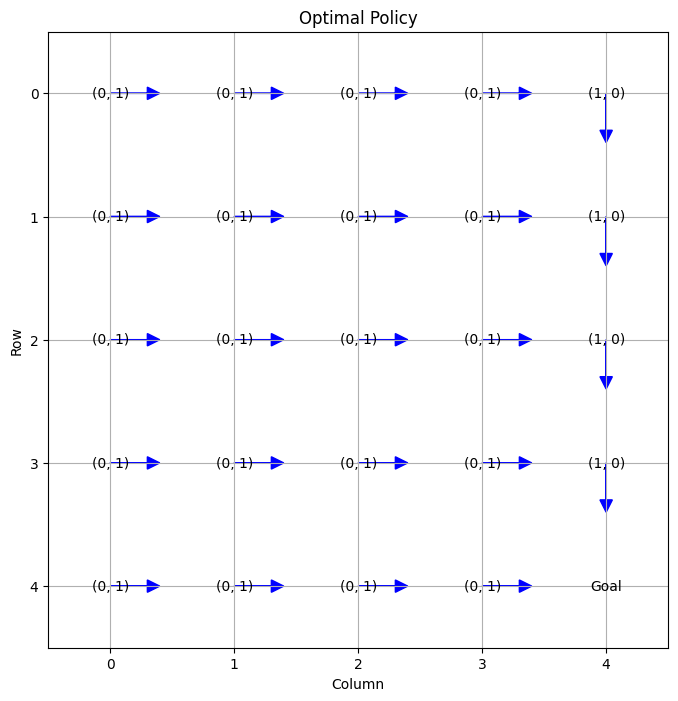

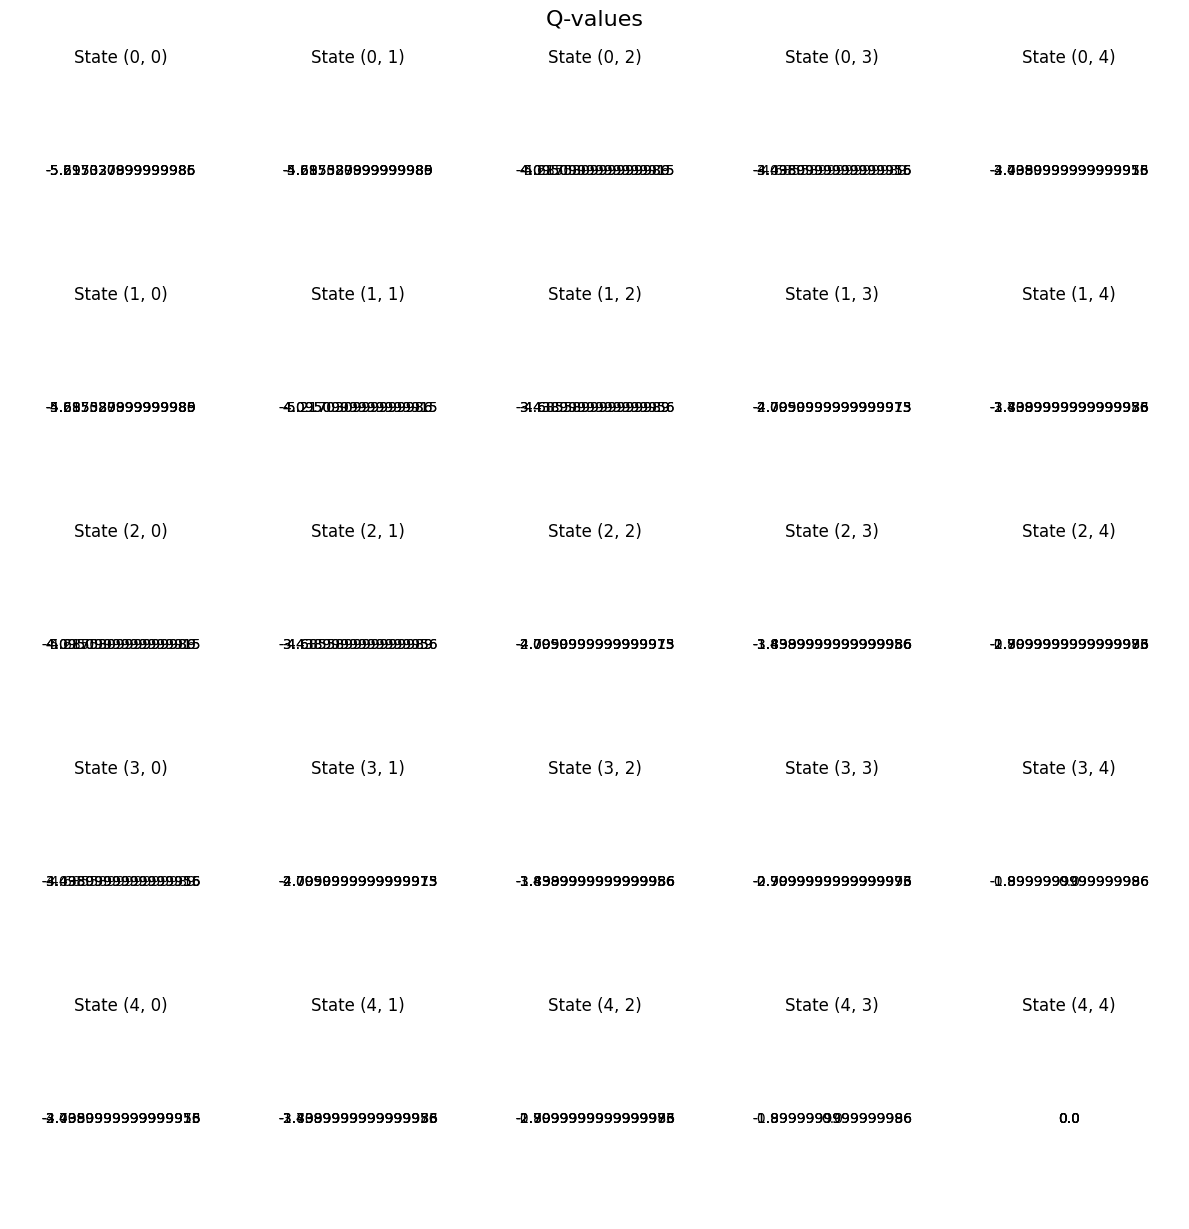

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize the optimal policy
def visualize_policy(Q, grid_size, actions):
    fig, ax = plt.subplots(figsize=(8, 8))
    
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            if (i, j) == goal_state:
                ax.text(j, i, 'Goal', ha='center', va='center')
            else:
                best_action = np.argmax(Q[i, j])
                arrow = actions[best_action]
                ax.arrow(j, i, arrow[1]*0.3, arrow[0]*0.3, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
                ax.text(j, i, str(actions[best_action]), ha='center', va='center')
    
    ax.set_xlim(-0.5, grid_size[1] - 0.5)
    ax.set_ylim(grid_size[0] - 0.5, -0.5)
    ax.set_xticks(np.arange(grid_size[1]))
    ax.set_yticks(np.arange(grid_size[0]))
    ax.grid(True)
    ax.set_title('Optimal Policy')
    ax.set_xlabel('Column')
    ax.set_ylabel('Row')
    
    plt.show()

# Function to visualize Q-values
def visualize_q_values(Q, grid_size):
    fig, ax = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 12))
    
    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            for a in range(len(actions)):
                ax[i, j].text(0.5, 0.5, str(Q[i, j, a]), ha='center', va='center')
                ax[i, j].axis('off')
                ax[i, j].set_title(f'State ({i}, {j})')
    
    plt.tight_layout()
    plt.suptitle('Q-values', y=1.02, fontsize=16)
    plt.show()

# Visualize the optimal policy and Q-values
visualize_policy(Q, grid_size, actions)
visualize_q_values(Q, grid_size)


## Function to visualize the optimal policy

`def visualize_policy(Q, grid_size, actions):`  
This function generates a visualization of the optimal policy derived from the Q-table `Q`, showing the recommended actions for each state in the grid world.

`fig, ax = plt.subplots(figsize=(8, 8))`  
Create a new figure (`fig`) and axis (`ax`) with a size of 8x8 inches to plot the visualization.

`for i in range(grid_size[0]):`  
Iterate over each row (`i`) in the grid world (`grid_size[0]`).

    `for j in range(grid_size[1]):`  
    Iterate over each column (`j`) in the grid world (`grid_size[1]`).

        `if (i, j) == goal_state:`  
        Check if the current position `(i, j)` matches the `goal_state`, marking it as 'Goal' in the plot.

        `else:`  
        If not at the goal state:

            `best_action = np.argmax(Q[i, j])`  
            Determine the best action (`best_action`) for state `(i, j)` based on the highest Q-value in the Q-table.

            `arrow = actions[best_action]`  
            Retrieve the corresponding movement direction (`arrow`) associated with `best_action`.

            `ax.arrow(j, i, arrow[1]*0.3, arrow[0]*0.3, head_width=0.1, head_length=0.1, fc='blue', ec='blue')`  
            Draw an arrow representing the best action direction at position `(j, i)` on the plot.

            `ax.text(j, i, str(actions[best_action]), ha='center', va='center')`  
            Display the textual representation of the best action (`actions[best_action]`) at position `(j, i)`.

`ax.set_xlim(-0.5, grid_size[1] - 0.5)`  
Set the x-axis limits to accommodate the entire grid world based on its width (`grid_size[1]`).

`ax.set_ylim(grid_size[0] - 0.5, -0.5)`  
Set the y-axis limits to accommodate the entire grid world based on its height (`grid_size[0]`).

`ax.set_xticks(np.arange(grid_size[1]))`  
Set the x-axis ticks based on the number of columns in the grid world (`grid_size[1]`).

`ax.set_yticks(np.arange(grid_size[0]))`  
Set the y-axis ticks based on the number of rows in the grid world (`grid_size[0]`).

`ax.grid(True)`  
Display grid lines on the plot to delineate the individual cells of the grid world.

`ax.set_title('Optimal Policy')`  
Set the plot title as 'Optimal Policy' to describe the purpose of the visualization.

`ax.set_xlabel('Column')`  
Label the x-axis as 'Column' to denote the horizontal position in the grid world.

`ax.set_ylabel('Row')`  
Label the y-axis as 'Row' to denote the vertical position in the grid world.

`plt.show()`  
Display the finalized plot showing the optimal policy for navigating the grid world based on the learned Q-values.

## Function to visualize Q-values

`def visualize_q_values(Q, grid_size):`  
This function generates a visualization of the Q-values stored in the Q-table `Q` for each state-action pair in the grid world.

`fig, ax = plt.subplots(grid_size[0], grid_size[1], figsize=(12, 12))`  
Create a grid of subplots (`fig`) with dimensions (`grid_size[0]`, `grid_size[1]`) and a figure size of 12x12 inches (`figsize`).

`for i in range(grid_size[0]):`  
Iterate over each row (`i`) in the grid world (`grid_size[0]`).

    `for j in range(grid_size[1]):`  
    Iterate over each column (`j`) in the grid world (`grid_size[1]`).

        `for a in range(len(actions)):`  
        Iterate over each action (`a`) available in the `actions` list.

            `ax[i, j].text(0.5, 0.5, str(Q[i, j, a]), ha='center', va='center')`  
            Display the Q-value (`Q[i, j, a]`) for the state (`i, j`) and action (`a`) at the center of subplot (`ax[i, j]`).

            `ax[i, j].axis('off')`  
            Turn off axis ticks and labels for each subplot to focus on Q-value visualization.

            `ax[i, j].set_title(f'State ({i}, {j})')`  
            Set the title of each subplot to denote the corresponding state `(i, j)` in the grid world.

`plt.tight_layout()`  
Adjust subplot parameters to ensure titles and axis labels do not overlap.

`plt.suptitle('Q-values', y=1.02, fontsize=16)`  
Set the overall title above the subplots to describe the purpose of the visualization ('Q-values').

`plt.show()`  
Display the finalized plot showing the Q-values stored in the Q-table `Q` for each state-action pair in the grid world.

## Visualize the optimal policy and Q-values

`visualize_policy(Q, grid_size, actions)`  
Call the `visualize_policy` function to visualize the optimal policy learned by Dyna-Q based on the Q-table `Q`, grid size, and possible actions.

`visualize_q_values(Q, grid_size)`  
Call the `visualize_q_values` function to visualize the Q-values stored in the Q-table `Q` for each state-action pair in the grid world.


___
## <span style="color:blue;">CONCLUSION</span>

___

### Summary of Dyna-Q Model Evaluation

The Dyna-Q algorithm was evaluated on a grid world environment, achieving an average reward of -7.0 over 100 episodes. Additionally, the average steps per episode were 1.0, indicating efficient navigation towards the goal state.

### Insights and Performance

Dyna-Q demonstrated efficient pathfinding capabilities, consistently reaching the goal state in minimal steps. However, the negative average reward suggests opportunities for optimizing action selections to maximize rewards during exploration.

The algorithm's stability and convergence were evident throughout the evaluation, showcasing its effectiveness in deterministic environments like the grid world.

### Recommendations

- Refine exploration-exploitation strategies, such as adjusting the epsilon-greedy policy, to potentially improve average rewards.
- Extend evaluations to include more complex environments or larger grid sizes to assess scalability and robustness.
- Explore enhancements to the learning mechanism or additional reinforcement learning techniques to further optimize performance.

### Acknowledgements

- **Environment**: The grid world simulation provided a controlled environment for evaluating Dyna-Q's navigation and learning capabilities.
- **Tools**: Python, NumPy, and Matplotlib facilitated implementation, evaluation, and visualization of the Dyna-Q algorithm.

Overall, Dyna-Q has demonstrated efficiency and effectiveness in learning optimal policies within deterministic environments, paving the way for future applications in navigation and reinforcement learning tasks.
